<a href="https://colab.research.google.com/github/shaaagri/iat481-cv-proj/blob/wip/DatasetVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b>Wildlife Detection CV Project - Dataset Visualization</b> </center> </h1>

This notebook serves as a tool to explore the final dataset that we have created after the merge of found datasets and our own manually labeled images.



The class_id is the numerical number assigned to different class labels as shown below:

In [1]:
class_labels = {
    0: "bear",
    1: "raccoon",
    2: "rat",
    3: "skunk"
}

First import the required libraries:

In [2]:
import cv2
import matplotlib.pyplot as plt
import random as random
import os

Set all the paths of the dataset:

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [8]:
# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final"

image_paths = []
label_paths = []

for subset_type in ['train', 'valid', 'test']:
  # Get the list of all images paths in the dataset
  image_paths += [os.path.join(dataset_path, subset_type, "images", image_name) for image_name in os.listdir(os.path.join(dataset_path, subset_type, "images"))]

  # Get the list of all training labels paths in the dataset
  label_paths = [os.path.join(dataset_path, "train", "labels", label_name) for label_name in os.listdir(os.path.join(dataset_path, "train", "labels"))]

print(len(image_paths), image_paths)

803 ['/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/170925_abc_social_polite_bears_16x9_992.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/31719703_web1_201126-CAN-wild-safe-bear_1.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/7h2u6tj3h3_brownbear_hero.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/84feb799-0287-4679-abb5-5f176d841770_750x422.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/AUG_170925_abc_social_polite_bears_16x9_992.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/AUG_84feb799-0287-4679-abb5-5f176d841770_750x422.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/AUG_bear-cub-3-2000-8b30852778c64809a47910f3c4d0e1b6.jpg', '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images/AUG_c23968ec-866f-41fa-9ca5-cb624e2dc782-jumbo3x1_bears1.jpg',

The funtion "draw_yolo_box", takes input an image path and its corresponding label path. Then, draws the bounding boxes and write the object's label in each box. Finally it displays the images

In [9]:
def draw_yolo_bbox(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read label file
    with open(label_path, 'r') as file:
        bboxes = file.readlines()

    # Draw each bbox
    for bbox in bboxes:
        class_id, x_center, y_center, bbox_width, bbox_height = [float(x) for x in bbox.split()]

        # Convert YOLO bbox format to rectangle coordinates
        x1 = int((x_center - bbox_width / 2) * width)
        y1 = int((y_center - bbox_height / 2) * height)
        x2 = int((x_center + bbox_width / 2) * width)
        y2 = int((y_center + bbox_height / 2) * height)

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Put label (class_id) near the bbox
        label = class_labels[int(class_id)]
        cv2.putText(image, label, (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

The function "print_random_images" takes in input the list of images' paths, a number defining how much images we want to print. So it randomly selects the images to display and calls "draw_yolo_bbox".

In [19]:
def print_random_images(photos: list, n: int = 5):
  for im in range(n):
        random_photo_path = random.choice(photos)
        label_path = random_photo_path.replace('images', 'labels').replace('.jpg', '.txt')
        #print(label_path)
        #label_path=dataset_path+"/labels/"+name+".txt"
        draw_yolo_bbox(random_photo_path ,label_path )



Now, finally calling the function to display 6 images randomly.

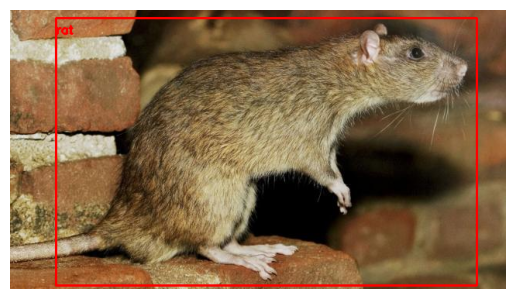

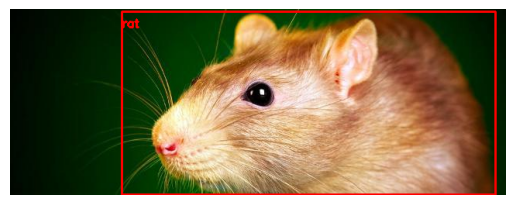

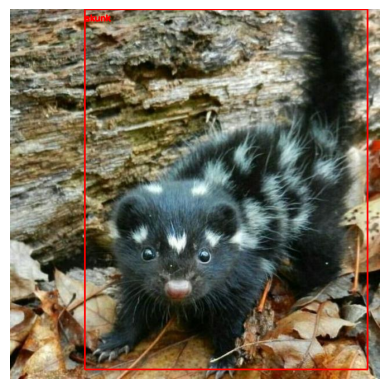

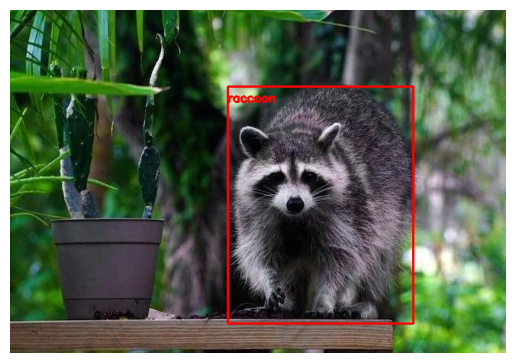

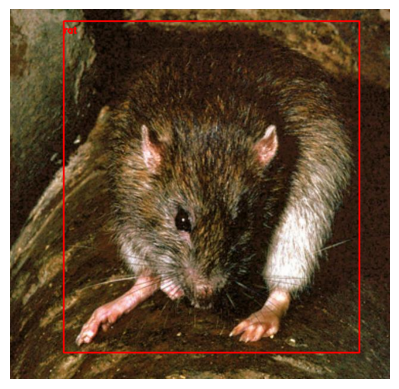

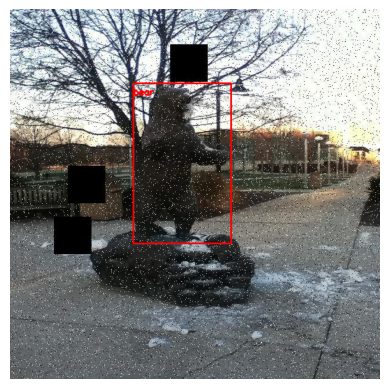

In [22]:
print_random_images(image_paths,n=6 )